<a href="https://colab.research.google.com/github/Yeen000/Aiffel/blob/master/car_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트 목표 및 목차
* 목표 : "중고차 가격 예측 모델"
## 목차
0. 데이터 합치기
1. 카테고리형 변수를 숫자 형태로 변환하기.
[힌트] Engine, Emission Class 변수에 주목
2. 결측치 처리하기.
[힌트] Service history 변수의 결측치는 'Unknown'으로 채우고, 결측치 변수가 일정 개수 이상 포함된 데이터는 제거
3. 이상치 제거
4. 상관관계 계산 후 처리 고민
5. 피처개수 줄이기 위해 브랜드, 모델, 국가 모두 상위 N개(예: 10~20개)만 남기고, 나머지는 ‘Other’로 처리
6. one-hot 인코딩
7. Scaler 활용
8. 기존 데이터의 정보 70% 이상을 가지는 수준에서 최소한의 주성분 추출 (PCA)


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
car_df = pd.read_csv('cars.csv')

In [ ]:
brand_df = pd.read_csv('brand.csv')

In [ ]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [ ]:
brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


## 데이터 살펴보기 및 join

In [ ]:
car_df['title'].value_counts()

title
VAUXHALL CORSA                                   223
FORD FOCUS                                       162
VAUXHALL ASTRA                                   155
FORD FIESTA                                      128
BMW 3 SERIES                                     119
                                                ... 
PROTON PROTON                                      1
ABARTH FIAT 595 1.4 TJET (165PS) SCORPIONEORO      1
KIA STONIC                                         1
TOYOTA PRIUS+                                      1
HONDA PRELUDE                                      1
Name: count, Length: 455, dtype: int64

In [ ]:
brand_df['title'].value_counts()

title
skoda            1
vauxhall         1
land             1
chevrolet        1
suzuki           1
dacia            1
daihatsu         1
jeep             1
jaguar           1
chrysler         1
rover            1
ds               1
daewoo           1
dodge            1
porsche          1
subaru           1
infiniti         1
abarth           1
smart            1
marcos           1
maserati         1
ssangyong        1
lagonda          1
lexus            1
mitsubishi       1
audi             1
saab             1
hyundai          1
mini             1
ford             1
volvo            1
peugeot          1
bmw              1
citroen          1
mercedes-benz    1
mazda            1
volkswagen       1
fiat             1
honda            1
mg               1
toyota           1
seat             1
nissan           1
alfa             1
renault          1
kia              1
proton           1
isuzu            1
Name: count, dtype: int64

In [ ]:
car_df['model'] = car_df['title'].apply(lambda x: x.split()[1].lower())
car_df['title'] = car_df['title'].apply(lambda x: x.split()[0].lower())

In [ ]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,model
0,skoda,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,fabia
1,vauxhall,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,corsa
2,hyundai,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,i30
3,mini,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,hatch
4,vauxhall,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,corsa


In [ ]:
car_df['title'].value_counts()

title
vauxhall         550
ford             410
volkswagen       272
bmw              269
peugeot          245
toyota           195
nissan           180
renault          175
mercedes-benz    168
audi             147
honda            108
fiat             104
mini              97
citroen           96
hyundai           93
kia               82
skoda             63
seat              60
mazda             54
suzuki            41
volvo             40
land              35
mitsubishi        33
jaguar            30
alfa              18
chevrolet         14
dacia             14
subaru            11
mg                10
lexus              9
jeep               9
saab               7
infiniti           7
ds                 6
chrysler           5
rover              5
smart              4
maserati           3
abarth             3
proton             3
porsche            3
daihatsu           2
ssangyong          2
dodge              1
daewoo             1
marcos             1
lagonda            1
isuzu  

In [ ]:
car_df['title'].nunique()

48

In [ ]:
brand_df['title'].nunique()

48

In [ ]:
final_car = car_df.merge(brand_df, on = 'title', how = 'left')

In [ ]:
final_car.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,model,country
0,skoda,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,fabia,Czech Republic
1,vauxhall,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,corsa,United Kingdom
2,hyundai,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,i30,South Korea
3,mini,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,hatch,United Kingdom
4,vauxhall,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,corsa,United Kingdom


In [ ]:
final_car[final_car.duplicated()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,model,country
12,skoda,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,fabia,Czech Republic
20,citroen,1949,114000,2013,NaN,Diesel,Hatchback,1.6L,Manual,5.0,5.0,Euro 5,NaN,c4,France
25,vauxhall,2950,79000,2011,4.0,Petrol,Hatchback,1.8L,Manual,5.0,5.0,Euro 5,NaN,insignia,United Kingdom
39,mercedes-benz,15900,62402,2019,1.0,Petrol,Hatchback,1.3L,Automatic,5.0,5.0,Euro 6,NaN,a,Germany
52,vauxhall,10698,22782,2020,NaN,Petrol,Hatchback,1.2L,Manual,5.0,5.0,Euro 6,NaN,corsa,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,mini,11999,33156,2018,1.0,Petrol,Hatchback,1.5L,Manual,5.0,5.0,Euro 6,Full,hatch,United Kingdom
3663,vauxhall,4999,60139,2015,2.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 6,NaN,astra,United Kingdom
3674,mitsubishi,1489,145000,2007,NaN,Diesel,SUV,2.0L,Manual,5.0,7.0,Euro 4,NaN,outlander,Japan
3675,vauxhall,4999,60139,2015,2.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 6,NaN,astra,United Kingdom


In [ ]:
final_car = final_car.drop_duplicates()

In [ ]:
final_car['country'].value_counts()

country
Germany           699
United Kingdom    556
Japan             473
France            384
United States     348
South Korea       139
Italy             108
Czech Republic     47
Spain              47
Sweden             41
Romania            14
Malaysia            3
Name: count, dtype: int64

In [ ]:
final_car['country'].replace({'United States': 'USA', 'United Kingdom': 'UK','Czech Republic':'Czech','South Korea':'Korea'},inplace=True )

/var/folders/gr/3h1sv3qn3hl5j6tjszlmc59c0000gn/T/ipykernel_92073/1610939019.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_car['country'].replace({'United States': 'USA', 'United Kingdom': 'UK','Czech Republic':'Czech','South Korea':'Korea'},inplace=True )


In [ ]:
final_car['country'].value_counts()

country
Germany     699
UK          556
Japan       473
France      384
USA         348
Korea       139
Italy       108
Czech        47
Spain        47
Sweden       41
Romania      14
Malaysia      3
Name: count, dtype: int64

In [ ]:
final_car.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,model,country
0,skoda,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,fabia,Czech
1,vauxhall,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,corsa,UK
2,hyundai,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,i30,Korea
3,mini,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,hatch,UK
4,vauxhall,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,corsa,UK


## 카테고리형 변수를 숫자 형태로 변환하기.
- [힌트] Engine, Emission Class 변수에 주목

In [ ]:
final_car['Engine'].value_counts()

Engine
1.6L    542
2.0L    477
1.2L    394
1.4L    366
1.0L    207
1.5L    184
1.3L    129
1.8L    125
3.0L     79
2.2L     66
2.1L     53
1.7L     35
2.5L     33
1.9L     31
2.4L     22
1.1L     20
0.9L     14
2.7L     11
3.5L     10
3.2L      7
4.4L      5
3.7L      5
2.3L      4
2.6L      4
4.2L      4
5.0L      3
2.8L      3
0.8L      2
4.3L      2
5.5L      1
4.8L      1
3.1L      1
3.3L      1
6.3L      1
Name: count, dtype: int64

In [ ]:
final_car['Engine']=final_car['Engine'].str[0:3].astype(float)
final_car['Engine'].value_counts()

Engine
1.6    542
2.0    477
1.2    394
1.4    366
1.0    207
1.5    184
1.3    129
1.8    125
3.0     79
2.2     66
2.1     53
1.7     35
2.5     33
1.9     31
2.4     22
1.1     20
0.9     14
2.7     11
3.5     10
3.2      7
4.4      5
3.7      5
2.3      4
2.6      4
4.2      4
5.0      3
2.8      3
0.8      2
4.3      2
5.5      1
4.8      1
3.1      1
3.3      1
6.3      1
Name: count, dtype: int64

In [ ]:
final_car['Emission Class'].value_counts()

Emission Class
Euro 5    1097
Euro 4     867
Euro 6     683
Euro 3     131
Euro 2      18
Euro 1       4
Name: count, dtype: int64

In [ ]:
final_car['Emission Class'].dtypes

dtype('O')

In [ ]:
# 문자열 변환
final_car['Emission Class'] = final_car['Emission Class'].astype(str)

# 'Euro ' 부분 제거 후 숫자로 변환
final_car['Emission Class'] = final_car['Emission Class'].str.replace('Euro ', '').astype(float)

final_car['Emission Class'].value_counts()

Emission Class
5.0    1097
4.0     867
6.0     683
3.0     131
2.0      18
1.0       4
Name: count, dtype: int64

In [ ]:
final_car.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,model,country
0,skoda,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,NaN,fabia,Czech
1,vauxhall,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,corsa,UK
2,hyundai,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,NaN,i30,Korea
3,mini,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,hatch,UK
4,vauxhall,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,NaN,corsa,UK


## 결측치처리
- [힌트] Service history 변수의 결측치는 'Unknown'으로 채우고, 결측치 변수가 일정 개수 이상 포함된 데이터는 제거

In [ ]:
final_car.isnull().sum()

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners       983
Fuel type               0
Body type               0
Engine                 17
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         59
Service history      2413
model                   0
country                 0
dtype: int64

In [ ]:
final_car['Service history'].value_counts()

Service history
Full    446
Name: count, dtype: int64

In [ ]:
final_car['Service history'] = final_car['Service history'].fillna('Unknown').astype('category')

In [ ]:
final_car['Service history'].value_counts()

Service history
Unknown    2413
Full        446
Name: count, dtype: int64

In [ ]:
#Emission Class의 결측치 데이터 확인
final_car[final_car['Emission Class'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,model,country
8,volvo,750,225318,2025,NaN,Petrol,Estate,2.3,Automatic,5.0,NaN,NaN,Unknown,740,Sweden
95,renault,2490,67104,2010,1.0,Diesel,Saloon,1.5,Manual,4.0,5.0,NaN,Unknown,fluence,France
163,honda,2449,88240,2012,NaN,Petrol,MPV,2.4,Automatic,5.0,7.0,NaN,Unknown,odyssey,Japan
178,mercedes-benz,3995,70000,2009,NaN,Petrol,Coupe,2.0,Automatic,2.0,5.0,NaN,Unknown,clk,Germany
229,mercedes-benz,2995,57400,1991,NaN,Petrol,Saloon,2.6,Automatic,4.0,NaN,NaN,Unknown,260,Germany
237,mg,1875,75043,1972,3.0,Petrol,Convertible,1.3,Manual,2.0,NaN,NaN,Unknown,midget,UK
513,nissan,3900,37000,2012,NaN,Petrol,MPV,2.0,Automatic,NaN,NaN,NaN,Unknown,lafesta,Japan
595,vauxhall,3950,56800,2015,4.0,Diesel,Hatchback,1.7,Manual,NaN,5.0,NaN,Unknown,astra,UK
645,rover,1650,49309,1990,4.0,Petrol,Saloon,1.0,Automatic,2.0,NaN,NaN,Unknown,mini,UK
679,bmw,4200,68060,2007,1.0,Petrol,Saloon,NaN,Automatic,NaN,NaN,NaN,Full,3,Germany


In [ ]:
#해당 데이터들이 편향분포되어있는지 확인
final_car[final_car['Emission Class'].isna()].groupby(['title', 'Registration_Year']).size()

title          Registration_Year
audi           2012                 2
bmw            1987                 1
               2007                 2
               2015                 1
citroen        1990                 1
               2015                 1
fiat           2015                 1
ford           2007                 1
               2009                 1
honda          2010                 1
               2012                 2
               2013                 1
isuzu          2001                 1
jaguar         2011                 1
lagonda        1953                 1
marcos         1981                 1
mazda          2008                 1
               2015                 1
               2021                 1
mercedes-benz  1991                 1
               2009                 1
               2012                 1
mg             1972                 1
mitsubishi     2001                 1
               2003                 1
nissan         19

In [ ]:
#분포가 고르게 되어있어 결측치 제거
final_car = final_car.dropna(subset=['Emission Class'])

In [ ]:
#Doors, Seat값이 결측치인 데이터들 확인 --> 제거됨
final_car[final_car['Doors'].isna()]
final_car[final_car['Seats'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,model,country
107,citroen,3250,126000,1995,4.0,Diesel,Hatchback,2.5,Manual,5.0,NaN,2.0,Unknown,xm,France
931,bmw,6700,105000,1999,7.0,Petrol,Coupe,2.5,Manual,2.0,NaN,2.0,Unknown,3,Germany
1006,saab,5995,157000,1992,5.0,Petrol,Convertible,2.0,Manual,2.0,NaN,1.0,Unknown,900,Sweden
1053,volkswagen,1250,110000,1996,NaN,Petrol,Convertible,2.0,Manual,2.0,NaN,1.0,Unknown,golf,Germany
2026,proton,3995,15760,1995,NaN,Petrol,Hatchback,1.5,Manual,5.0,NaN,1.0,Unknown,proton,Malaysia
2456,vauxhall,4250,35616,2010,1.0,Diesel,Combi Van,1.3,Manual,3.0,NaN,4.0,Unknown,combo,UK


In [ ]:
final_car[final_car['Engine'].isna()] #한개이므로 제거
final_car = final_car.dropna(subset=['Engine'])

In [ ]:
#Previous Owners 값이 결측치인 데이터들 확인
final_car[final_car['Previous Owners'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,model,country
2,hyundai,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,i30,Korea
4,vauxhall,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,corsa,UK
6,ford,798,140599,2008,NaN,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,Unknown,focus,USA
7,vauxhall,1995,90000,2009,NaN,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Unknown,corsa,UK
10,ford,1495,181693,2009,NaN,Diesel,Hatchback,1.6,Manual,3.0,5.0,4.0,Full,fiesta,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3672,fiat,1295,84000,2007,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,4.0,Unknown,idea,Italy
3680,citroen,1795,85962,2009,NaN,Diesel,Hatchback,1.4,Manual,5.0,5.0,4.0,Unknown,c3,France
3683,audi,6990,119000,2012,NaN,Petrol,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown,a4,Germany
3684,bmw,3995,139000,2013,NaN,Diesel,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown,3,Germany


In [ ]:
print(final_car['Previous Owners'].median())
print(final_car['Previous Owners'].mean())
#결측치가 많고, 수치형 데이터 형식을 유지하기 위해 median값으로 대체

3.0
2.8838849701573523


In [ ]:
median_val=final_car['Previous Owners'].median()
final_car['Previous Owners'].fillna(median_val, inplace=True)
final_car['Previous Owners'].describe()

/var/folders/gr/3h1sv3qn3hl5j6tjszlmc59c0000gn/T/ipykernel_92073/4105932219.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_car['Previous Owners'].fillna(median_val, inplace=True)


count    2799.000000
mean        2.923544
std         1.251681
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         9.000000
Name: Previous Owners, dtype: float64

In [ ]:
final_car.isnull().sum()

title                0
Price                0
Mileage(miles)       0
Registration_Year    0
Previous Owners      0
Fuel type            0
Body type            0
Engine               0
Gearbox              0
Doors                0
Seats                6
Emission Class       0
Service history      0
model                0
country              0
dtype: int64

## 이상치 제거

In [ ]:
final_car.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,model,country
0,skoda,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,fabia,Czech
1,vauxhall,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,corsa,UK
2,hyundai,949,137000,2011,3.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,i30,Korea
3,mini,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,hatch,UK
4,vauxhall,1000,85000,2013,3.0,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,corsa,UK


In [ ]:
final_car.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
count,2799.00000,2.799000e+03,2799.000000,2799.000000,2799.000000,2799.000000,2793.000000,2799.000000
mean,5324.78671,8.409191e+04,2011.404073,2.923544,1.645766,4.324402,4.889008,4.815648
std,4134.63223,3.964608e+04,4.545615,1.251681,0.515779,0.982594,0.585643,0.887704
min,400.00000,1.000000e+00,1992.000000,1.000000,0.800000,2.000000,2.000000,1.000000
25%,2449.00000,6.000000e+04,2008.000000,2.000000,1.300000,3.000000,5.000000,4.000000
50%,3995.00000,8.389000e+04,2011.000000,3.000000,1.600000,5.000000,5.000000,5.000000
75%,6995.00000,1.056810e+05,2014.000000,3.000000,2.000000,5.000000,5.000000,5.000000
max,33900.00000,1.110100e+06,2023.000000,9.000000,6.300000,5.000000,7.000000,6.000000


In [ ]:
final_car['Price'].sort_values().tail(20)

2231    20500
2793    20999
2967    21495
2760    21495
3128    21798
3036    21998
3063    22600
3061    22999
3122    23220
2990    23600
3213    23910
2862    24444
2183    24770
3130    25000
2913    25100
3102    25995
3230    25995
3224    28240
2936    30000
3212    33900
Name: Price, dtype: int64

<Axes: ylabel='Price'>

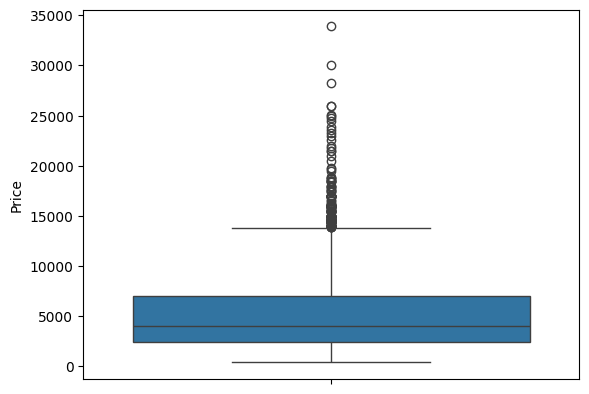

In [ ]:
import seaborn as sns
sns.boxplot(final_car['Price']) #딱히 이상치는 아닌 것 같아서 pass

In [ ]:
final_car['Registration_Year'].sort_values().head(30)

1006    1992
2590    1993
2026    1995
107     1995
1053    1996
1059    1997
305     1997
1254    1997
3679    1998
278     1998
1114    1998
1246    1999
46      1999
123     1999
931     1999
306     1999
108     2000
3418    2000
3353    2000
1719    2000
1126    2001
1240    2001
418     2001
484     2001
3384    2001
3501    2001
3396    2001
3609    2001
2189    2001
930     2001
Name: Registration_Year, dtype: int64

<Axes: ylabel='Registration_Year'>

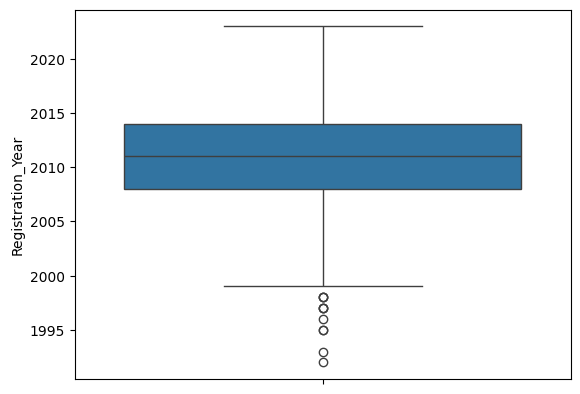

In [ ]:
sns.boxplot(final_car['Registration_Year']) #요것도 이상치까지는 아닌 것 같음

In [ ]:
final_car['Previous Owners'].sort_values().tail(30)

3510    7.0
3505    7.0
152     7.0
1216    7.0
161     7.0
3479    7.0
1220    7.0
1238    7.0
1809    7.0
3429    7.0
245     7.0
257     7.0
272     7.0
1246    8.0
1156    8.0
995     8.0
1639    8.0
1329    8.0
720     8.0
586     8.0
3281    8.0
358     8.0
3294    8.0
3493    8.0
1206    8.0
404     9.0
3331    9.0
212     9.0
3463    9.0
1314    9.0
Name: Previous Owners, dtype: float64

<Axes: xlabel='None', ylabel='Previous Owners'>

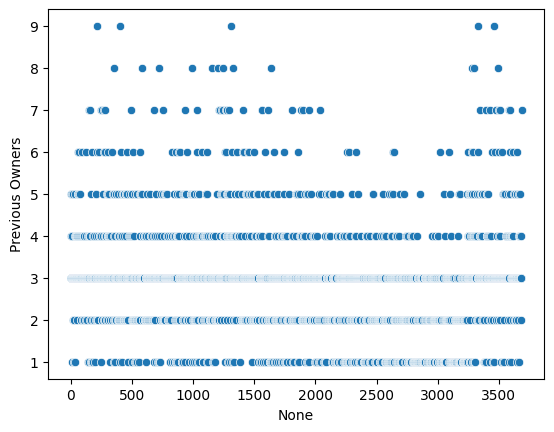

In [ ]:
sns.scatterplot(x = final_car.index, y = final_car['Previous Owners']) #이상치 아닌 것 같아서 pass!

## 상관관계 계산

In [ ]:
corr = final_car.corr(numeric_only = True)
corr # Emission Class와 Registration_Year가 매우 높은 상관관계 가짐 -> 추후 PCA 활용 ?

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
Price,1.000000,-0.458664,0.741767,-0.353689,0.021470,0.108418,0.020564,0.667194
Mileage(miles),-0.458664,1.000000,-0.390167,0.247949,0.317451,-0.027658,0.081126,-0.325052
Registration_Year,0.741767,-0.390167,1.000000,-0.375104,-0.291991,0.198372,0.060265,0.910466
Previous Owners,-0.353689,0.247949,-0.375104,1.000000,0.137455,-0.123670,-0.041760,-0.342065
Engine,0.021470,0.317451,-0.291991,0.137455,1.000000,-0.098345,0.045865,-0.257347
Doors,0.108418,-0.027658,0.198372,-0.123670,-0.098345,1.000000,0.524310,0.159550
Seats,0.020564,0.081126,0.060265,-0.041760,0.045865,0.524310,1.000000,0.043151
Emission Class,0.667194,-0.325052,0.910466,-0.342065,-0.257347,0.159550,0.043151,1.000000


## one-hot 인코딩

In [ ]:
# 데이터 분포 확인 및 데이터 최적화
final_car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2799 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   title              2799 non-null   object  
 1   Price              2799 non-null   int64   
 2   Mileage(miles)     2799 non-null   int64   
 3   Registration_Year  2799 non-null   int64   
 4   Previous Owners    2799 non-null   float64 
 5   Fuel type          2799 non-null   object  
 6   Body type          2799 non-null   object  
 7   Engine             2799 non-null   float64 
 8   Gearbox            2799 non-null   object  
 9   Doors              2799 non-null   float64 
 10  Seats              2793 non-null   float64 
 11  Emission Class     2799 non-null   float64 
 12  Service history    2799 non-null   category
 13  model              2799 non-null   object  
 14  country            2799 non-null   object  
dtypes: category(1), float64(5), int64(3), object(6)
memory usage

In [ ]:
'''
title, Fuel type, body type, model, country 범주형 변수들의 고유값을 확인하고
너무 많으면 고유값 개수 제한 후 원핫 인코딩 시행 (빈도수 높은 상위 10~20개 범주만 원핫 인코딩함)
'''

'\ntitle, Fuel type, body type, model, country 범주형 변수들의 고유값을 확인하고\n너무 많으면 고유값 개수 제한 후 원핫 인코딩 시행 (빈도수 높은 상위 10~20개 범주만 원핫 인코딩함)\n'

In [ ]:
# 범주형 변수 분포 확인


In [ ]:
final_car['model'].value_counts().head(50)

model
corsa       159
fiesta      114
astra       112
focus        99
3            97
hatch        70
golf         60
clio         58
1            55
polo         55
c            48
a3           46
qashqai      45
civic        42
500          40
yaris        38
insignia     37
c3           36
rover        35
ibiza        33
mondeo       31
megane       30
207          30
208          28
jazz         28
308          27
5            24
a            23
passat       23
e            23
juke         23
fabia        22
micra        21
a4           21
ka           20
grand        20
c4           20
i30          19
i20          18
romeo        18
aygo         18
zafira       18
3008         15
adam         15
mazda3       14
x1           14
a6           14
mazda2       14
kuga         14
c1           14
Name: count, dtype: int64

In [ ]:
final_car['country'].value_counts()

country
Germany     680
UK          546
Japan       450
France      381
USA         346
Korea       139
Italy       107
Czech        47
Spain        46
Sweden       40
Romania      14
Malaysia      3
Name: count, dtype: int64

In [ ]:
# title, model, country 고유값 제한

In [ ]:
def limit_top_categories(df, column, top_n):
    top_categories = df[column].value_counts().index[:top_n]
    df[column] = df[column].apply(lambda x: x if x in top_categories else 'Other')
    return df

# 예시) 사용자가 결정한 top_n 값을 적용
final_car = limit_top_categories(final_car, 'title', top_n=15)    # 예: top 15
final_car = limit_top_categories(final_car, 'model', top_n=20)    # 예: top 20
final_car = limit_top_categories(final_car, 'country', top_n=10)  # 예: top 10

print(final_car[['title', 'model', 'country']].nunique())


title      16
model      21
country    11
dtype: int64


In [ ]:
pd.set_option('display.max_columns', 50)

In [ ]:
final_car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2799 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   title              2799 non-null   object  
 1   Price              2799 non-null   int64   
 2   Mileage(miles)     2799 non-null   int64   
 3   Registration_Year  2799 non-null   int64   
 4   Previous Owners    2799 non-null   float64 
 5   Fuel type          2799 non-null   object  
 6   Body type          2799 non-null   object  
 7   Engine             2799 non-null   float64 
 8   Gearbox            2799 non-null   object  
 9   Doors              2799 non-null   float64 
 10  Seats              2793 non-null   float64 
 11  Emission Class     2799 non-null   float64 
 12  Service history    2799 non-null   category
 13  model              2799 non-null   object  
 14  country            2799 non-null   object  
dtypes: category(1), float64(5), int64(3), object(6)
memory usage

In [ ]:
# 최종 원핫 인코딩
final_car = pd.get_dummies(final_car, columns=[])

final_car_encoded = pd.get_dummies(final_car, columns = ['title', 'model', 'country','Service history','Gearbox','Body type','Fuel type'], drop_first = True, dtype=int)
final_car_encoded

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,title_audi,title_bmw,title_citroen,title_fiat,title_ford,title_honda,title_hyundai,title_mercedes-benz,title_mini,title_nissan,title_peugeot,title_renault,title_toyota,title_vauxhall,title_volkswagen,model_3,model_500,...,model_yaris,country_France,country_Germany,country_Italy,country_Japan,country_Korea,country_Other,country_Spain,country_Sweden,country_UK,country_USA,Service history_Unknown,Gearbox_Manual,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Pickup,Body type_SUV,Body type_Saloon,Fuel type_Diesel Hybrid,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid
0,6900,70189,2016,3.0,1.4,5.0,5.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
1,1495,88585,2008,4.0,1.2,3.0,5.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,949,137000,2011,3.0,1.4,5.0,5.0,5.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
3,2395,96731,2010,5.0,1.4,3.0,4.0,4.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,1000,85000,2013,3.0,1.3,5.0,5.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,1395,76202,2006,4.0,1.6,5.0,5.0,4.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
3683,6990,119000,2012,3.0,2.0,4.0,5.0,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0
3684,3995,139000,2013,3.0,2.0,4.0,5.0,5.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
3685,1390,179190,2007,3.0,2.2,5.0,5.0,4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


## Scaler 활용해보기
- StandardScaler를 사용해 각 변수의 평균을 0, 표준편차를 1로 맞춰줌

In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. 데이터 표준화 (Scaler)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_car_encoded)

# Scaler가 적용된 데이터 출력
print("Scaled Data Shape:", scaled_data.shape)

Scaled Data Shape: (2799, 67)


In [ ]:
scaled_df = pd.DataFrame(scaled_data, columns=final_car_encoded.columns)
scaled_df

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,title_audi,title_bmw,title_citroen,title_fiat,title_ford,title_honda,title_hyundai,title_mercedes-benz,title_mini,title_nissan,title_peugeot,title_renault,title_toyota,title_vauxhall,title_volkswagen,model_3,model_500,...,model_yaris,country_France,country_Germany,country_Italy,country_Japan,country_Korea,country_Other,country_Spain,country_Sweden,country_UK,country_USA,Service history_Unknown,Gearbox_Manual,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Pickup,Body type_SUV,Body type_Saloon,Fuel type_Diesel Hybrid,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid
0,0.381048,-0.350738,1.011249,0.061093,-0.476580,0.687689,0.189555,1.334413,-0.208864,-0.29637,-0.184353,-0.174813,-0.359283,-0.188457,-0.16931,-0.226859,-0.170423,-0.219806,-0.249478,-0.21072,-0.191485,-0.402958,-0.272896,-0.189471,-0.120408,...,-0.117316,-0.396949,-0.566486,-0.199367,-0.437688,-0.228595,-0.078171,-0.129263,-0.120408,-0.492284,-0.375569,0.431879,0.536732,-0.182271,-0.196443,-0.209794,0.819173,-0.219806,-0.032756,-0.396949,-0.344536,-0.018905,-1.325758,-0.070901,-0.042303
1,-0.926436,0.113350,-0.749003,0.860162,-0.864412,-1.348103,0.189555,-0.918994,-0.208864,-0.29637,-0.184353,-0.174813,-0.359283,-0.188457,-0.16931,-0.226859,-0.170423,-0.219806,-0.249478,-0.21072,-0.191485,2.481646,-0.272896,-0.189471,-0.120408,...,-0.117316,-0.396949,-0.566486,-0.199367,-0.437688,-0.228595,-0.078171,-0.129263,-0.120408,2.031348,-0.375569,-2.315462,0.536732,-0.182271,-0.196443,-0.209794,0.819173,-0.219806,-0.032756,-0.396949,-0.344536,-0.018905,0.754285,-0.070901,-0.042303
2,-1.058515,1.334748,-0.088909,0.061093,-0.476580,0.687689,0.189555,0.207709,-0.208864,-0.29637,-0.184353,-0.174813,-0.359283,-0.188457,5.90632,-0.226859,-0.170423,-0.219806,-0.249478,-0.21072,-0.191485,-0.402958,-0.272896,-0.189471,-0.120408,...,-0.117316,-0.396949,-0.566486,-0.199367,-0.437688,4.374550,-0.078171,-0.129263,-0.120408,-0.492284,-0.375569,0.431879,0.536732,-0.182271,-0.196443,-0.209794,0.819173,-0.219806,-0.032756,-0.396949,-0.344536,-0.018905,0.754285,-0.070901,-0.042303
3,-0.708723,0.318855,-0.308940,1.659231,-0.476580,-1.348103,-1.518277,-0.918994,-0.208864,-0.29637,-0.184353,-0.174813,-0.359283,-0.188457,-0.16931,-0.226859,5.867741,-0.219806,-0.249478,-0.21072,-0.191485,-0.402958,-0.272896,-0.189471,-0.120408,...,-0.117316,-0.396949,-0.566486,-0.199367,-0.437688,-0.228595,-0.078171,-0.129263,-0.120408,2.031348,-0.375569,-2.315462,0.536732,-0.182271,-0.196443,-0.209794,0.819173,-0.219806,-0.032756,-0.396949,-0.344536,-0.018905,0.754285,-0.070901,-0.042303
4,-1.046178,0.022909,0.351154,0.061093,-0.670496,0.687689,0.189555,0.207709,-0.208864,-0.29637,-0.184353,-0.174813,-0.359283,-0.188457,-0.16931,-0.226859,-0.170423,-0.219806,-0.249478,-0.21072,-0.191485,2.481646,-0.272896,-0.189471,-0.120408,...,-0.117316,-0.396949,-0.566486,-0.199367,-0.437688,-0.228595,-0.078171,-0.129263,-0.120408,2.031348,-0.375569,0.431879,0.536732,-0.182271,-0.196443,-0.209794,0.819173,-0.219806,-0.032756,-0.396949,-0.344536,-0.018905,-1.325758,-0.070901,-0.042303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,-0.950626,-0.199044,-1.189067,0.860162,-0.088748,0.687689,0.189555,-0.918994,-0.208864,-0.29637,-0.184353,-0.174813,-0.359283,-0.188457,-0.16931,-0.226859,-0.170423,-0.219806,-0.249478,4.74563,-0.191485,-0.402958,-0.272896,-0.189471,-0.120408,...,-0.117316,2.519217,-0.566486,-0.199367,-0.437688,-0.228595,-0.078171,-0.129263,-0.120408,-0.492284,-0.375569,0.431879,0.536732,-0.182271,-0.196443,-0.209794,0.819173,-0.219806,-0.032756,-0.396949,-0.344536,-0.018905,0.754285,-0.070901,-0.042303
2795,0.402820,0.880650,0.131123,0.061093,0.686916,-0.330207,0.189555,0.207709,4.787805,-0.

## PCA 적용

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
scaled_df.head(10)

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,title_audi,title_bmw,title_citroen,title_fiat,title_ford,title_honda,title_hyundai,title_mercedes-benz,title_mini,title_nissan,title_peugeot,title_renault,title_toyota,title_vauxhall,title_volkswagen,model_3,model_500,...,model_yaris,country_France,country_Germany,country_Italy,country_Japan,country_Korea,country_Other,country_Spain,country_Sweden,country_UK,country_USA,Service history_Unknown,Gearbox_Manual,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Pickup,Body type_SUV,Body type_Saloon,Fuel type_Diesel Hybrid,Fuel type_Petrol,Fuel type_Petrol Hybrid,Fuel type_Petrol Plug-in Hybrid
0,0.381048,-0.350738,1.011249,0.061093,-0.476580,0.687689,0.189555,1.334413,-0.208864,-0.29637,-0.184353,-0.174813,-0.359283,-0.188457,-0.16931,-0.226859,-0.170423,-0.219806,-0.249478,-0.21072,-0.191485,-0.402958,-0.272896,-0.189471,-0.120408,...,-0.117316,-0.396949,-0.566486,-0.199367,-0.437688,-0.228595,-0.078171,-0.129263,-0.120408,-0.492284,-0.375569,0.431879,0.536732,-0.182271,-0.196443,-0.209794,0.819173,-0.219806,-0.032756,-0.396949,-0.344536,-0.018905,-1.325758,-0.070901,-0.042303
1,-0.926436,0.113350,-0.749003,0.860162,-0.864412,-1.348103,0.189555,-0.918994,-0.208864,-0.29637,-0.184353,-0.174813,-0.359283,-0.188457,-0.16931,-0.226859,-0.170423,-0.219806,-0.249478,-0.21072,-0.191485,2.481646,-0.272896,-0.189471,-0.120408,...,-0.117316,-0.396949,-0.566486,-0.199367,-0.437688,-0.228595,-0.078171,-0.129263,-0.120408,2.031348,-0.375569,-2.315462,0.536732,-0.182271,-0.196443,-0.209794,0.819173,-0.219806,-0.032756,-0.396949,-0.344536,-0.018905,0.754285,-0.070901,-0.042303
2,-1.058515,1.334748,-0.088909,0.061093,-0.476580,0.687689,0.189555,0.207709,-0.208864,-0.29637,-0.184353,-0.174813,-0.359283,-0.188457,5.90632,-0.226859,-0.170423,-0.219806,-0.249478,-0.21072,-0.191485,-0.402958,-0.272896,-0.189471,-0.120408,...,-0.117316,-0.396949,-0.566486,-0.199367,-0.437688,4.374550,-0.078171,-0.129263,-0.120408,-0.492284,-0.375569,0.431879,0.536732,-0.182271,-0.196443,-0.209794,0.819173,-0.219806,-0.032756,-0.396949,-0.344536,-0.018905,0.754285,-0.070901,-0.042303
3,-0.708723,0.318855,-0.308940,1.659231,-0.476580,-1.348103,-1.518277,-0.918994,-0.208864,-0.29637,-0.184353,-0.174813,-0.359283,-0.188457,-0.16931,-0.226859,5.867741,-0.219806,-0.249478,-0.21072,-0.191485,-0.402958,-0.272896,-0.189471,-0.120408,...,-0.117316,-0.396949,-0.566486,-0.199367,-0.437688,-0.228595,-0.078171,-0.129263,-0.120408,2.031348,-0.375569,-2.315462,0.536732,-0.182271,-0.196443,-0.209794,0.819173,-0.219806,-0.032756,-0.396949,-0.344536,-0.018905,0.754285,-0.070901,-0.042303
4,-1.046178,0.022909,0.351154,0.061093,-0.670496,0.687689,0.189555,0.207709,-0.208864,-0.29637,-0.184353,-0.174813,-0.359283,-0.188457,-0.16931,-0.226859,-0.170423,-0.219806,-0.249478,-0.21072,-0.191485,2.481646,-0.272896,-0.189471,-0.120408,...,-0.117316,-0.396949,-0.566486,-0.199367,-0.437688,-0.228595,-0.078171,-0.129263,-0.120408,2.031348,-0.375569,0.431879,0.536732,-0.182271,-0.196443,-0.209794,0.819173,-0.219806,-0.032756,-0.396949,-0.344536,-0.018905,-1.325758,-0.070901,-0.042303
5,-1.094558,1.011733,-0.969035,0.061093,0.686916,-1.348103,-1.518277,-0.918994,-0.208864,-0.29637,-0.184353,-0.174813,-0.359283,-0.188457,5.90632,-0.226859,-0.170423,-0.219806,-0.249478,-0.21072,-0.191485,-0.402958,-0.272896,-0.189471,-0.120408,...,-0.117316,-0.396949,-0.566486,-0.199367,-0.437688,4.374550,-0.078171,-0.129263,-0.120408,-0.492284,-0.375569,0.431879,0.536732,-0.182271,5.090527,-0.209794,-1.220743,-0.219806,-0.032756,-0.396949,-0.344536,-0.018905,0.754285,-0.070901,-0.042303
6,-1.095042,1.425543,-0.749003,0.061093,-0.088748,0.687689,0.189555,-0.918994,-0.208864,-0.29637,-0.184353,-0.174813,2.783321,-0.188457,-0.16931,-0.226859,-0.170423,-0.219806,-0.249478,-0.21072,-0.191485,-0.402958,-0.272896,-0.189471,-0.120408,...,-0.117316,-0.396949,-0.566486,-0.199367,-0.437688,-0.

In [ ]:
print(scaled_df.isnull().sum().sum()) #인코딩과정중 생긴 결측치 확인

6


In [ ]:
scaled_df.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA()
pca_data = pca.fit_transform(scaled_df)

# 3. 설명 분산 비율 확인
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# 4. 누적 설명 분산 비율 출력
for i, cumulative_var in enumerate(cumulative_variance):
    print(f'PC{i+1}: {cumulative_var:.4f}')

PC1: 0.0654
PC2: 0.1187
PC3: 0.1676
PC4: 0.2117
PC5: 0.2555
PC6: 0.2944
PC7: 0.3292
PC8: 0.3626
PC9: 0.3926
PC10: 0.4212
PC11: 0.4485
PC12: 0.4746
PC13: 0.5004
PC14: 0.5261
PC15: 0.5515
PC16: 0.5764
PC17: 0.5996
PC18: 0.6196
PC19: 0.6393
PC20: 0.6573
PC21: 0.6742
PC22: 0.6904
PC23: 0.7063
PC24: 0.7221
PC25: 0.7375
PC26: 0.7527
PC27: 0.7677
PC28: 0.7826
PC29: 0.7973
PC30: 0.8117
PC31: 0.8257
PC32: 0.8388
PC33: 0.8507
PC34: 0.8625
PC35: 0.8735
PC36: 0.8839
PC37: 0.8941
PC38: 0.9035
PC39: 0.9117
PC40: 0.9188
PC41: 0.9256
PC42: 0.9319
PC43: 0.9380
PC44: 0.9439
PC45: 0.9494
PC46: 0.9548
PC47: 0.9599
PC48: 0.9647
PC49: 0.9694
PC50: 0.9736
PC51: 0.9775
PC52: 0.9811
PC53: 0.9842
PC54: 0.9870
PC55: 0.9897
PC56: 0.9921
PC57: 0.9943
PC58: 0.9960
PC59: 0.9970
PC60: 0.9980
PC61: 0.9987
PC62: 0.9993
PC63: 0.9996
PC64: 0.9998
PC65: 0.9999
PC66: 1.0000
PC67: 1.0000


In [ ]:
#차원 23으로 설정
pca = PCA(23)
pd.DataFrame(pca.fit_transform(scaled_df))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,-0.816049,1.438093,0.111098,0.334407,0.286680,-0.135158,0.262202,-0.027185,0.416429,0.004237,-0.056003,0.277238,0.178626,0.347992,0.190368,0.323811,0.489303,0.082587,-0.525254,0.274659,-0.417754,0.364760,0.508003
1,-2.077662,-2.521366,2.576284,-2.175495,-0.505386,0.473538,-0.078804,-1.168463,-0.145362,0.165837,-0.983274,-0.295188,0.055862,-0.624823,-0.539257,-1.148759,-0.474555,-1.248078,-0.034681,-0.419805,1.004598,0.393894,-0.506300
2,-0.870193,0.442311,-1.083731,0.217538,-0.890679,-0.087649,-0.046355,-0.290198,6.303322,-0.134149,-1.225613,-1.378720,-0.537813,0.289505,0.503987,0.291046,-3.276259,0.476956,0.052562,0.457664,-0.379955,0.327006,-0.032357
3,-1.383805,-3.904949,3.345446,-0.146972,-1.084868,-0.182357,-1.384506,5.820524,0.754189,-2.012905,3.429410,0.651492,-0.345296,0.250584,0.568566,2.154904,-0.607686,-0.275723,-0.961049,-0.117339,-0.451339,-0.697174,-0.969239
4,-2.268576,-0.889141,2.601413,-2.585613,0.117156,0.381817,0.058579,-1.488766,-0.217832,0.100052,-0.733575,-0.060307,0.124714,0.004665,-0.171752,-0.473458,-0.334075,-0.940564,-0.329415,0.373525,0.519267,1.169099,0.777385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,-0.828334,-0.504408,-1.479040,0.865244,-1.682926,3.353450,-0.288497,-0.182549,-0.452813,-0.159183,-0.064569,-1.298400,0.450563,-1.350705,0.493177,1.030863,-0.410881,-0.507419,0.089370,0.043168,0.163173,0.125440,0.156433
2789,2.687644,0.406061,0.356975,0.364963,0.537192,0.069477,0.694320,-0.312280,0.513980,-0.156150,0.217259,0.093800,3.046495,0.938590,-0.523189,0.122891,0.110793,-0.985437,-0.955743,-0.163710,0.838084,0.066193,0.099194
2790,4.269181,-0.178055,1.058103,-0.012688,1.461700,0.080590,0.311881,-0.275804,-1.543977,0.950125,-0.905062,-2.722440,-1.856697,2.736206,-0.102860,1.328873,-0.982619,-0.522628,-1.701560,0.842757,-0.461519,-0.072600,0.479628
2791,1.583380,-0.365292,-2.515554,-2.272403,-2.230412,-0.687019,-0.388754,-0.764142,0.170911,-0.206649,0.639185,0.114356,0.453546,0.763910,3.028325,0.296235,1.875384,3.141375,-1.109314,-0.702179,0.267452,-0.801982,-0.471566


In [ ]:
(pca.explained_variance_ratio_).sum()

np.float64(0.7062755216707974)